In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
data_kelas_benar = pd.read_csv('/content/gerakan-benar.csv')
data_kelas_salah = pd.read_csv('/content/gerakan-salah.csv')

In [ ]:
data_kelas_benar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ax1     73 non-null     float64
 1   ay1     73 non-null     float64
 2   az1     73 non-null     float64
 3   gx1     73 non-null     float64
 4   gy1     73 non-null     float64
 5   gz1     73 non-null     float64
 6   ax2     73 non-null     float64
 7   ay2     73 non-null     float64
 8   az2     73 non-null     float64
 9   gx2     73 non-null     float64
 10  gy2     73 non-null     float64
 11  gz2     73 non-null     float64
 12  ax3     73 non-null     float64
 13  ay3     73 non-null     float64
 14  az3     73 non-null     float64
 15  gx3     73 non-null     float64
 16  gy3     73 non-null     float64
 17  gz3     73 non-null     float64
dtypes: float64(18)
memory usage: 10.4 KB


In [ ]:
data_kelas_salah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ax1     100 non-null    float64
 1   ay1     100 non-null    float64
 2   az1     100 non-null    float64
 3   gx1     100 non-null    float64
 4   gy1     100 non-null    float64
 5   gz1     100 non-null    float64
 6   ax2     100 non-null    float64
 7   ay2     100 non-null    float64
 8   az2     100 non-null    float64
 9   gx2     100 non-null    float64
 10  gy2     100 non-null    float64
 11  gz2     100 non-null    float64
 12  ax3     100 non-null    float64
 13  ay3     100 non-null    float64
 14  az3     100 non-null    float64
 15  gx3     100 non-null    float64
 16  gy3     100 non-null    float64
 17  gz3     100 non-null    float64
dtypes: float64(18)
memory usage: 14.2 KB


In [ ]:
data_kelas_benar.tail()

,ax1,ay1,az1,gx1,gy1,gz1,ax2,ay2,az2,gx2,gy2,gz2,ax3,ay3,az3,gx3,gy3,gz3
68,2.23,7.04,4.24,-1.14,-0.53,0.22,5.80,7.47,-2.65,0.02,-0.15,-0.33,0.14,9.63,-0.03,0.04,-0.14,0.00
69,2.35,7.69,3.26,-0.87,-0.33,0.28,6.08,7.33,-2.43,0.02,0.03,-0.32,0.38,9.56,-0.03,0.00,0.02,0.02
70,3.09,8.25,2.95,0.25,-0.06,-0.08,6.68,7.25,-2.25,-0.13,-0.03,-0.02,0.25,9.66,-0.33,0.04,0.04,-0.01
71,2.63,8.17,3.59,-0.46,-0.13,0.14,6.49,7.34,-2.60,-0.03,-0.04,-0.14,0.66,9.48,0.37,-0.02,-0.02,-0.02
72,1.72,8.17,2.93,0.57,0.00,-0.20,7.20,6.72,-2.61,-0.20,-0.13,0.02,0.11,9.59,0.44,-0.02,0.01,-0.03


In [ ]:
data_kelas_salah.tail()

,ax1,ay1,az1,gx1,gy1,gz1,ax2,ay2,az2,gx2,gy2,gz2,ax3,ay3,az3,gx3,gy3,gz3
95,10.55,-9.14,4.45,0.50,0.29,-0.54,4.86,8.96,-1.65,0.14,0.57,0.36,1.32,9.75,-0.65,-0.01,0.00,0.01
96,7.16,2.13,-1.98,-1.96,0.18,0.76,8.26,4.04,1.00,-0.67,-1.24,-1.15,-0.28,9.39,0.39,0.12,0.05,0.12
97,9.42,-7.75,4.43,2.59,0.16,-2.19,7.10,8.49,-1.47,0.36,1.01,1.64,0.60,9.52,-0.28,-0.07,-0.05,-0.01
98,6.94,0.43,0.97,-2.89,0.30,1.45,7.56,6.11,-1.07,-0.82,-1.51,-1.38,0.17,9.62,0.46,0.07,0.02,0.31
99,6.93,-3.27,4.62,3.18,-0.19,-1.36,6.52,7.51,-1.49,0.59,1.33,1.25,0.87,9.56,0.27,-0.04,-0.01,-0.09


In [ ]:
arr_data_kelas_benar = np.array(data_kelas_benar)
arr_data_kelas_salah = np.array(data_kelas_salah)

In [ ]:
arr_data_kelas_benar

array([[ 2.91,  6.17,  3.59, ..., -0.06,  0.02,  0.01],
       [ 2.58,  8.36,  2.91, ...,  0.  ,  0.12,  0.03],
       [ 4.09,  6.41,  4.38, ..., -0.03,  0.03,  0.02],
       ...,
       [ 3.09,  8.25,  2.95, ...,  0.04,  0.04, -0.01],
       [ 2.63,  8.17,  3.59, ..., -0.02, -0.02, -0.02],
       [ 1.72,  8.17,  2.93, ..., -0.02,  0.01, -0.03]])

In [ ]:
arr_data_kelas_salah

array([[ 3.3 , -6.13,  5.3 , ...,  0.03,  0.08,  0.03],
       [ 5.87, -2.27,  6.23, ...,  0.12,  0.16,  0.09],
       [ 3.25,  0.26,  4.64, ...,  0.14, -0.05,  0.03],
       ...,
       [ 9.42, -7.75,  4.43, ..., -0.07, -0.05, -0.01],
       [ 6.94,  0.43,  0.97, ...,  0.07,  0.02,  0.31],
       [ 6.93, -3.27,  4.62, ..., -0.04, -0.01, -0.09]])

In [ ]:
df_avg_kelas_benar = pd.DataFrame(data=arr_data_kelas_benar,
                                 columns=['avg_acc1_x','avg_acc1_y','avg_acc1_z',
                                        'avg_giro1_x','avg_giro1_y','avg_giro1_z',
                                        'avg_acc2_x','avg_acc2_y','avg_acc2_z',
                                        'avg_giro2_x','avg_giro2_y','avg_giro2_z',
                                        'avg_acc3_x','avg_acc3_y','avg_acc3_z',
                                        'avg_giro3_x','avg_giro3_y','avg_giro3_z'])
df_avg_kelas_benar.head()

,avg_acc1_x,avg_acc1_y,avg_acc1_z,avg_giro1_x,avg_giro1_y,avg_giro1_z,avg_acc2_x,avg_acc2_y,avg_acc2_z,avg_giro2_x,avg_giro2_y,avg_giro2_z,avg_acc3_x,avg_acc3_y,avg_acc3_z,avg_giro3_x,avg_giro3_y,avg_giro3_z
0,2.91,6.17,3.59,-1.67,-0.46,0.92,5.53,8.00,-1.73,0.31,0.16,-0.41,-0.22,9.47,-2.62,-0.06,0.02,0.01
1,2.58,8.36,2.91,0.18,0.07,-0.21,5.77,7.74,-1.23,-0.14,-0.04,-0.07,-0.28,9.57,-2.27,0.00,0.12,0.03
2,4.09,6.41,4.38,-1.30,-0.25,0.87,5.13,8.39,-1.98,0.41,0.09,-0.29,-0.09,9.46,-2.35,-0.03,0.03,0.02
3,3.58,7.54,3.47,0.51,0.13,-0.46,5.27,8.04,-1.34,-0.23,-0.09,0.00,-0.18,9.62,-1.83,0.04,0.12,-0.02
4,4.02,6.64,4.09,-1.16,-0.05,0.92,5.04,8.26,-1.68,0.27,0.12,-0.38,0.18,9.50,-1.97,-0.02,-0.06,0.03


In [ ]:
df_avg_kelas_salah = pd.DataFrame(data=arr_data_kelas_salah,
                                 columns=['avg_acc1_x','avg_acc1_y','avg_acc1_z',
                                        'avg_giro1_x','avg_giro1_y','avg_giro1_z',
                                        'avg_acc2_x','avg_acc2_y','avg_acc2_z',
                                        'avg_giro2_x','avg_giro2_y','avg_giro2_z',
                                        'avg_acc3_x','avg_acc3_y','avg_acc3_z',
                                        'avg_giro3_x','avg_giro3_y','avg_giro3_z'])
df_avg_kelas_salah.head()

,avg_acc1_x,avg_acc1_y,avg_acc1_z,avg_giro1_x,avg_giro1_y,avg_giro1_z,avg_acc2_x,avg_acc2_y,avg_acc2_z,avg_giro2_x,avg_giro2_y,avg_giro2_z,avg_acc3_x,avg_acc3_y,avg_acc3_z,avg_giro3_x,avg_giro3_y,avg_giro3_z
0,3.30,-6.13,5.30,-0.14,-0.10,0.07,-0.65,5.40,1.94,0.01,0.16,0.00,-0.02,9.65,-1.23,0.03,0.08,0.03
1,5.87,-2.27,6.23,-2.15,0.25,1.27,0.07,7.81,4.61,0.66,0.90,-0.36,-0.73,9.64,-1.35,0.12,0.16,0.09
2,3.25,0.26,4.64,0.41,-0.50,-0.15,0.22,7.40,5.04,-0.30,-0.11,-0.08,0.23,9.55,-1.55,0.14,-0.05,0.03
3,4.26,-5.44,6.57,2.04,-0.11,-0.96,-1.51,7.90,5.08,-0.18,-0.31,0.40,0.03,9.57,-2.13,-0.14,-0.14,0.08
4,3.66,-10.31,4.25,0.03,-0.27,-0.14,-1.82,7.20,4.15,0.12,-0.06,0.46,0.46,9.48,-2.38,0.09,0.09,-0.08


In [ ]:
df_avg_kelas_benar['kelas'] = 'benar'
df_avg_kelas_salah['kelas'] = 'salah'

In [ ]:
df_avg_kelas_benar.tail()

,avg_acc1_x,avg_acc1_y,avg_acc1_z,avg_giro1_x,avg_giro1_y,avg_giro1_z,avg_acc2_x,avg_acc2_y,avg_acc2_z,avg_giro2_x,avg_giro2_y,avg_giro2_z,avg_acc3_x,avg_acc3_y,avg_acc3_z,avg_giro3_x,avg_giro3_y,avg_giro3_z,kelas
68,2.23,7.04,4.24,-1.14,-0.53,0.22,5.80,7.47,-2.65,0.02,-0.15,-0.33,0.14,9.63,-0.03,0.04,-0.14,0.00,benar
69,2.35,7.69,3.26,-0.87,-0.33,0.28,6.08,7.33,-2.43,0.02,0.03,-0.32,0.38,9.56,-0.03,0.00,0.02,0.02,benar
70,3.09,8.25,2.95,0.25,-0.06,-0.08,6.68,7.25,-2.25,-0.13,-0.03,-0.02,0.25,9.66,-0.33,0.04,0.04,-0.01,benar
71,2.63,8.17,3.59,-0.46,-0.13,0.14,6.49,7.34,-2.60,-0.03,-0.04,-0.14,0.66,9.48,0.37,-0.02,-0.02,-0.02,benar
72,1.72,8.17,2.93,0.57,0.00,-0.20,7.20,6.72,-2.61,-0.20,-0.13,0.02,0.11,9.59,0.44,-0.02,0.01,-0.03,benar


In [ ]:
df_avg_kelas_salah.tail()

,avg_acc1_x,avg_acc1_y,avg_acc1_z,avg_giro1_x,avg_giro1_y,avg_giro1_z,avg_acc2_x,avg_acc2_y,avg_acc2_z,avg_giro2_x,avg_giro2_y,avg_giro2_z,avg_acc3_x,avg_acc3_y,avg_acc3_z,avg_giro3_x,avg_giro3_y,avg_giro3_z,kelas
95,10.55,-9.14,4.45,0.50,0.29,-0.54,4.86,8.96,-1.65,0.14,0.57,0.36,1.32,9.75,-0.65,-0.01,0.00,0.01,salah
96,7.16,2.13,-1.98,-1.96,0.18,0.76,8.26,4.04,1.00,-0.67,-1.24,-1.15,-0.28,9.39,0.39,0.12,0.05,0.12,salah
97,9.42,-7.75,4.43,2.59,0.16,-2.19,7.10,8.49,-1.47,0.36,1.01,1.64,0.60,9.52,-0.28,-0.07,-0.05,-0.01,salah
98,6.94,0.43,0.97,-2.89,0.30,1.45,7.56,6.11,-1.07,-0.82,-1.51,-1.38,0.17,9.62,0.46,0.07,0.02,0.31,salah
99,6.93,-3.27,4.62,3.18,-0.19,-1.36,6.52,7.51,-1.49,0.59,1.33,1.25,0.87,9.56,0.27,-0.04,-0.01,-0.09,salah


In [ ]:
df_concat = pd.concat([df_avg_kelas_benar[:70], df_avg_kelas_salah[:70]], ignore_index=True)
df_concat

,avg_acc1_x,avg_acc1_y,avg_acc1_z,avg_giro1_x,avg_giro1_y,avg_giro1_z,avg_acc2_x,avg_acc2_y,avg_acc2_z,avg_giro2_x,avg_giro2_y,avg_giro2_z,avg_acc3_x,avg_acc3_y,avg_acc3_z,avg_giro3_x,avg_giro3_y,avg_giro3_z,kelas
0,2.91,6.17,3.59,-1.67,-0.46,0.92,5.53,8.00,-1.73,0.31,0.16,-0.41,-0.22,9.47,-2.62,-0.06,0.02,0.01,benar
1,2.58,8.36,2.91,0.18,0.07,-0.21,5.77,7.74,-1.23,-0.14,-0.04,-0.07,-0.28,9.57,-2.27,0.00,0.12,0.03,benar
2,4.09,6.41,4.38,-1.30,-0.25,0.87,5.13,8.39,-1.98,0.41,0.09,-0.29,-0.09,9.46,-2.35,-0.03,0.03,0.02,benar
3,3.58,7.54,3.47,0.51,0.13,-0.46,5.27,8.04,-1.34,-0.23,-0.09,0.00,-0.18,9.62,-1.83,0.04,0.12,-0.02,benar
4,4.02,6.64,4.09,-1.16,-0.05,0.92,5.04,8.26,-1.68,0.27,0.12,-0.38,0.18,9.50,-1.97,-0.02,-0.06,0.03,benar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,6.58,-7.41,3.15,-1.85,-0.56,0.95,3.05,9.53,-1.76,0.04,-0.01,-0.34,0.69,9.19,1.80,-0.04,-0.02,0.03,salah
136,7.71,4.92,0.12,0.89,-0.42,-0.43,5.60,7.47,-1.55,0.12,0.47,0.00,0.33,9.30,1.85,-0.01,0.09,-0.03,salah
137,7.56,-1.62,2.70,-2.67,-0.08,1.64,4.18,8.33,-1.39,-0.06,-0.48,-0.51,0.32,9.37,1.86,0.01,0.05,0.05,salah
138,8.33,-4.10,3.86,2.37,-0.08,-1.43,4.93,8.75,-2.20,0.13,0.43,0.30,0.29,9.39,2.09,0.01,-0.07,-0.03,salah


In [ ]:
df_concat['kelas'].value_counts()

benar    70
salah    70
Name: kelas, dtype: int64

In [ ]:
df_concat['kelas'] = df_concat['kelas'].map({'benar': 1, 'salah': 0})
df_concat

,avg_acc1_x,avg_acc1_y,avg_acc1_z,avg_giro1_x,avg_giro1_y,avg_giro1_z,avg_acc2_x,avg_acc2_y,avg_acc2_z,avg_giro2_x,avg_giro2_y,avg_giro2_z,avg_acc3_x,avg_acc3_y,avg_acc3_z,avg_giro3_x,avg_giro3_y,avg_giro3_z,kelas
0,2.91,6.17,3.59,-1.67,-0.46,0.92,5.53,8.00,-1.73,0.31,0.16,-0.41,-0.22,9.47,-2.62,-0.06,0.02,0.01,1
1,2.58,8.36,2.91,0.18,0.07,-0.21,5.77,7.74,-1.23,-0.14,-0.04,-0.07,-0.28,9.57,-2.27,0.00,0.12,0.03,1
2,4.09,6.41,4.38,-1.30,-0.25,0.87,5.13,8.39,-1.98,0.41,0.09,-0.29,-0.09,9.46,-2.35,-0.03,0.03,0.02,1
3,3.58,7.54,3.47,0.51,0.13,-0.46,5.27,8.04,-1.34,-0.23,-0.09,0.00,-0.18,9.62,-1.83,0.04,0.12,-0.02,1
4,4.02,6.64,4.09,-1.16,-0.05,0.92,5.04,8.26,-1.68,0.27,0.12,-0.38,0.18,9.50,-1.97,-0.02,-0.06,0.03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,6.58,-7.41,3.15,-1.85,-0.56,0.95,3.05,9.53,-1.76,0.04,-0.01,-0.34,0.69,9.19,1.80,-0.04,-0.02,0.03,0
136,7.71,4.92,0.12,0.89,-0.42,-0.43,5.60,7.47,-1.55,0.12,0.47,0.00,0.33,9.30,1.85,-0.01,0.09,-0.03,0
137,7.56,-1.62,2.70,-2.67,-0.08,1.64,4.18,8.33,-1.39,-0.06,-0.48,-0.51,0.32,9.37,1.86,0.01,0.05,0.05,0
138,8.33,-4.10,3.86,2.37,-0.08,-1.43,4.93,8.75,-2.20,0.13,0.43,0.30,0.29,9.39,2.09,0.01,-0.07,-0.03,0


In [ ]:
X = np.array(df_concat.iloc[:, :-1])
y = np.array(df_concat.iloc[:, -1])
print(X.shape)
print(y.shape)

(140, 18)
(140,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Misalnya, data_train adalah data pelatihan, dan label_train adalah label yang sesuai
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi
predictions = rf_model.predict(X_test)

# Evaluasi performa
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

(112, 18)
(28, 18)
(112,)
(28,)
Accuracy: 0.9642857142857143


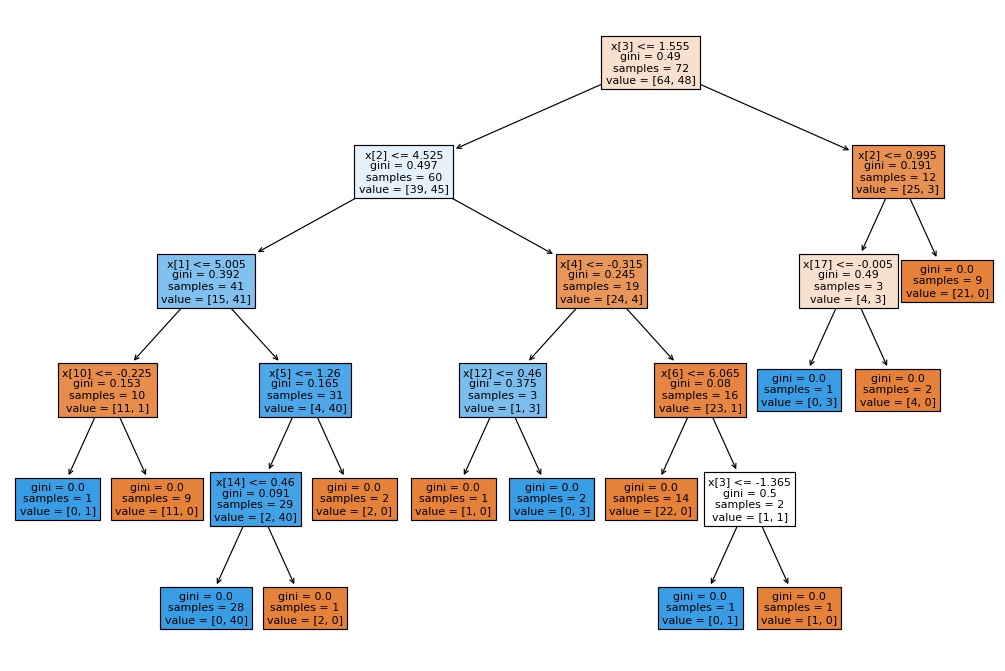

In [ ]:
plt.subplots(figsize=(15,10))
tree.plot_tree(rf_model.estimators_[1], filled=True)
plt.show()

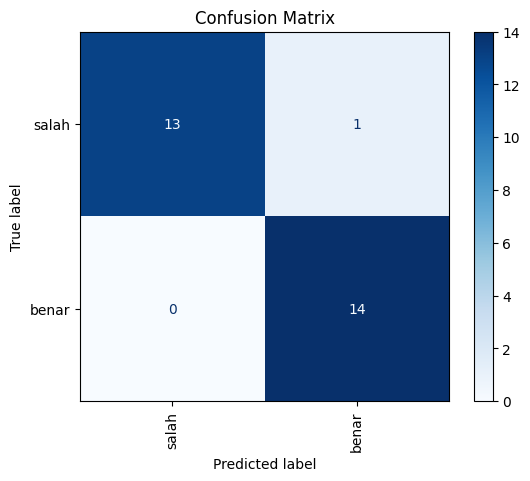

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Tampilkan confusion matrix dengan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['salah','benar'])
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.96        28
weighted avg       0.97      0.96      0.96        28



In [ ]:
print(X_test)

[[ 6.900e-01 -1.152e+01 -1.420e+00 -4.100e-01  1.000e-02  2.500e-01
  -6.130e+00  8.120e+00 -3.070e+00 -1.100e-01  2.700e-01 -5.000e-02
   3.740e+00  6.640e+00 -8.720e+00  3.600e-01  2.200e-01  2.500e-01]
 [ 9.900e-01  6.720e+00  4.420e+00 -1.520e+00 -3.400e-01  1.900e-01
   5.570e+00  7.340e+00 -3.190e+00 -1.000e-02 -2.000e-02 -3.600e-01
   9.600e-01  9.540e+00  4.700e-01  1.000e-02 -9.000e-02  2.000e-02]
 [ 3.990e+00  5.460e+00  3.210e+00  1.040e+00 -6.000e-02 -1.110e+00
   4.940e+00  8.280e+00 -1.700e+00 -3.400e-01 -1.200e-01  1.500e-01
  -4.000e-01  9.540e+00 -1.910e+00  9.000e-02  3.100e-01 -1.000e-01]
 [ 3.450e+00  6.300e+00  2.270e+00 -2.090e+00 -6.000e-02  1.360e+00
   9.630e+00 -3.320e+00  1.710e+00  7.000e-02 -1.900e-01 -6.300e-01
  -1.210e+00  9.420e+00 -9.200e-01  3.000e-02  5.000e-02  1.300e-01]
 [ 4.660e+00  5.330e+00  4.100e-01 -1.770e+00 -2.400e-01  1.170e+00
   6.440e+00  7.070e+00  3.400e-01  6.000e-02 -1.600e-01 -5.900e-01
   3.000e-02  9.560e+00 -5.800e-01 -1.000e-0

In [ ]:
data_uji = pd.DataFrame(X_test)
data_uji

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.69,-11.52,-1.42,-0.41,0.01,0.25,-6.13,8.12,-3.07,-0.11,0.27,-0.05,3.74,6.64,-8.72,0.36,0.22,0.25
1,0.99,6.72,4.42,-1.52,-0.34,0.19,5.57,7.34,-3.19,-0.01,-0.02,-0.36,0.96,9.54,0.47,0.01,-0.09,0.02
2,3.99,5.46,3.21,1.04,-0.06,-1.11,4.94,8.28,-1.70,-0.34,-0.12,0.15,-0.40,9.54,-1.91,0.09,0.31,-0.10
3,3.45,6.30,2.27,-2.09,-0.06,1.36,9.63,-3.32,1.71,0.07,-0.19,-0.63,-1.21,9.42,-0.92,0.03,0.05,0.13
4,4.66,5.33,0.41,-1.77,-0.24,1.17,6.44,7.07,0.34,0.06,-0.16,-0.59,0.03,9.56,-0.58,-0.01,0.05,0.01
5,4.09,6.34,4.09,-1.46,-0.09,0.94,5.78,7.98,-1.94,0.24,0.15,-0.52,0.61,23.40,8.27,-0.26,-0.82,0.00
6,4.95,-9.54,4.75,1.20,-0.30,-0.58,-2.90,7.75,3.62,-0.01,0.35,0.14,0.55,9.79,-3.76,0.05,0.13,0.01
7,2.35,7.69,3.26,-0.87,-0.33,0.28,6.08,7.33,-2.43,0.02,0.03,-0.32,0.38,9.56,-0.03,0.00,0.02,0.02
8,2.42,-13.09,1.34,3.25,-0.03,-2.26,-1.62,9.34,-1.83,-0.33,0.40,1.95,4.00,8.06,-8.55,-1.05,0.65,-0.32
9,4.94,5.89,0.11,0.82,-0.83,-0.81,5.44,8.16,0.92,-0.33,-0.17,0.20,0.74,7.94,0.96,-0.40,0.30,-0.29


In [ ]:
data_uji.to_csv('data_uji.csv')

In [ ]:
!pip install micromlgen

  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32152 sha256=3e7a4e47ea7c200bbbd340b25cd277bca4a4461b2871a8a8dde01d23d414e300
  Stored in directory: /root/.cache/pip/wheels/97/54/64/5d82c310920abe1be0d120313ceb9e12c88f5701f53f6ed248
Successfully built micromlgen


In [ ]:
from micromlgen import port

In [ ]:
LABELS = ['SALAH','BENAR'] #our existing labels
classMap = {} #create an empty dict
for i, label in zip(range(2),LABELS): #interate over the range and the labels at the same time
  classMap[i]=label #fill our dict

print(classMap)

{0: 'SALAH', 1: 'BENAR'}


In [ ]:
c_code = port(rf_model,classmap={0: 'SALAH', 1: 'BENAR'}) #convert our model

#Let's write it into a .h file
modelFile = open("model_RF_new.h", "w")
modelFile.write(c_code)
modelFile.close()

#Let's print the size of the .h file
import os
model_h_size = os.path.getsize("model_RF_new.h")
print(f"Header file, model_z.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model_z.h, is 209,317 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data_kelas_benar = pd.read_csv('/content/gerakan-benar-prev.csv')
data_kelas_salah = pd.read_csv('/content/gerakan-salah.csv')

arr_data_kelas_benar = np.array(data_kelas_benar)
arr_data_kelas_salah = np.array(data_kelas_salah)

df_avg_kelas_benar = pd.DataFrame(data=arr_data_kelas_benar,
                                 columns=['avg_acc1_x','avg_acc1_y','avg_acc1_z',
                                        'avg_giro1_x','avg_giro1_y','avg_giro1_z',
                                        'avg_acc2_x','avg_acc2_y','avg_acc2_z',
                                        'avg_giro2_x','avg_giro2_y','avg_giro2_z',
                                        'avg_acc3_x','avg_acc3_y','avg_acc3_z',
                                        'avg_giro3_x','avg_giro3_y','avg_giro3_z'])

df_avg_kelas_salah = pd.DataFrame(data=arr_data_kelas_salah,
                                 columns=['avg_acc1_x','avg_acc1_y','avg_acc1_z',
                                        'avg_giro1_x','avg_giro1_y','avg_giro1_z',
                                        'avg_acc2_x','avg_acc2_y','avg_acc2_z',
                                        'avg_giro2_x','avg_giro2_y','avg_giro2_z',
                                        'avg_acc3_x','avg_acc3_y','avg_acc3_z',
                                        'avg_giro3_x','avg_giro3_y','avg_giro3_z'])

df_avg_kelas_benar['kelas'] = 'benar'
df_avg_kelas_salah['kelas'] = 'salah'

df_concat = pd.concat([df_avg_kelas_benar[:100], df_avg_kelas_salah], ignore_index=True)
df_concat


,avg_acc1_x,avg_acc1_y,avg_acc1_z,avg_giro1_x,avg_giro1_y,avg_giro1_z,avg_acc2_x,avg_acc2_y,avg_acc2_z,avg_giro2_x,avg_giro2_y,avg_giro2_z,avg_acc3_x,avg_acc3_y,avg_acc3_z,avg_giro3_x,avg_giro3_y,avg_giro3_z,kelas
0,4.26,-4.97,1.90,-0.34,-0.09,0.18,2.72,6.00,-1.15,0.03,0.04,0.06,0.19,9.42,-2.62,-0.06,0.26,0.00,benar
1,6.33,-7.33,3.01,-0.13,-0.03,0.02,3.98,8.87,-2.19,0.00,0.03,-0.05,0.01,9.32,-2.40,-0.09,0.14,-0.01,benar
2,4.92,2.95,6.16,1.62,0.44,-0.92,5.55,7.97,-2.02,-0.29,0.00,0.29,0.10,9.41,-2.16,-0.01,0.13,-0.04,benar
3,2.91,6.17,3.59,-1.67,-0.46,0.92,5.53,8.00,-1.73,0.31,0.16,-0.41,-0.22,9.47,-2.62,-0.06,0.02,0.01,benar
4,7.66,-6.99,5.53,0.32,0.23,-0.37,3.80,9.02,-2.43,-0.14,-0.17,0.06,0.23,9.79,-1.85,0.04,0.01,0.03,benar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,10.55,-9.14,4.45,0.50,0.29,-0.54,4.86,8.96,-1.65,0.14,0.57,0.36,1.32,9.75,-0.65,-0.01,0.00,0.01,salah
196,7.16,2.13,-1.98,-1.96,0.18,0.76,8.26,4.04,1.00,-0.67,-1.24,-1.15,-0.28,9.39,0.39,0.12,0.05,0.12,salah
197,9.42,-7.75,4.43,2.59,0.16,-2.19,7.10,8.49,-1.47,0.36,1.01,1.64,0.60,9.52,-0.28,-0.07,-0.05,-0.01,salah
198,6.94,0.43,0.97,-2.89,0.30,1.45,7.56,6.11,-1.07,-0.82,-1.51,-1.38,0.17,9.62,0.46,0.07,0.02,0.31,salah


In [ ]:
df_concat['kelas'].value_counts()

benar    100
salah    100
Name: kelas, dtype: int64

In [ ]:
df_concat['kelas'] = df_concat['kelas'].map({'benar': 1, 'salah': 0})

X = np.array(df_concat.iloc[:, :-1])
y = np.array(df_concat.iloc[:, -1])

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model with some common parameters
svm_model = SVC(kernel='rbf', C=1.0, gamma=0.01, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
predictions = svm_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [ ]:
c_code = port(svm_model,classmap={0: 'SALAH', 1: 'BENAR'}) #convert our model

#Let's write it into a .h file
modelFile = open("model_svm.h", "w")
modelFile.write(c_code)
modelFile.close()

#Let's print the size of the .h file
import os
model_h_size = os.path.getsize("model_svm.h")